In this lecture quiz, there are three tasks.
Part I build a table of the mapping between p-values and Z-score
Part II find the shortest interval of Baysian Credibility interval
Part III Fit binned maximum log likelihood estimator, and compare performance with the unbinned maximum log likelihood


# Part I p-values from signifance Z or n-sigma

First part of the exercise is to practice conversion between p-value and significance Z-score (n-sigma)

In [76]:
import numpy as np  # handles most of the numerical work
import scipy.stats as stats # implements statistical tools (PDFs, etc)
from matplotlib import pyplot as plt # for plotting
%matplotlib inline

In [77]:
# define p-value
p = 0.05

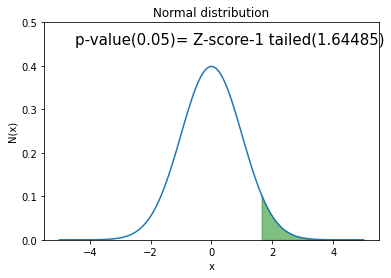

In [78]:
# calculate number of standard deviations (n-sigma) from p-value

# one-tailed
n_sigma_one_tailed = stats.norm.ppf(1-p)

# Draw a normal distribution as before
xvals = np.linspace(-5,5,100)
yvals = [ stats.norm.pdf(xval) for xval in xvals ]
fig = plt.figure()
plt.plot(xvals, yvals)
plt.ylim(0,0.5)
plt.title("Normal distribution")
plt.xlabel('x')
plt.ylabel('N(x)')

# Now fill in part of the distribution and print the integral
up = 1
shaded_xvals = np.linspace(n_sigma_one_tailed,5,100)
shaded_yvals = [ stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
plt.text(-4.5, 0.45, 'p-value(%g)= Z-score-1 tailed(%g)' % (p, n_sigma_one_tailed), fontsize=15);

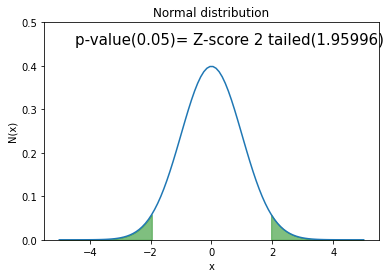

In [79]:
# calculate number of standard deviations (n-sigma) from p-value

# two-tailed
n_sigma_two_tailed = stats.norm.ppf(1-p/2.)

# Draw a normal distribution as before
xvals = np.linspace(-5,5,100)
yvals = [ stats.norm.pdf(xval) for xval in xvals ]
fig = plt.figure()
plt.plot(xvals, yvals)
plt.ylim(0,0.5)
plt.title("Normal distribution")
plt.xlabel('x')
plt.ylabel('N(x)')

# Now fill in part of the distribution and print the integral
up = 1
shaded_xvals = np.linspace(n_sigma_two_tailed,5,50)
shaded_yvals = [ stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
shaded_xvals = np.linspace(-5,-n_sigma_two_tailed,50)
shaded_yvals = [ stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
plt.text(-4.5, 0.45, 'p-value(%g)= Z-score 2 tailed(%g)' % (p, n_sigma_two_tailed), fontsize=15);

In [80]:

print(f" p-value = {p}, n_sigma_one_tailed = {n_sigma_one_tailed:.4f}, n_sigma_two_tailed = {n_sigma_two_tailed:.4f}")


 p-value = 0.05, n_sigma_one_tailed = 1.6449, n_sigma_two_tailed = 1.9600


In [81]:
# p-value from number of standard deviations (n-sigma)
n_sigma = 5



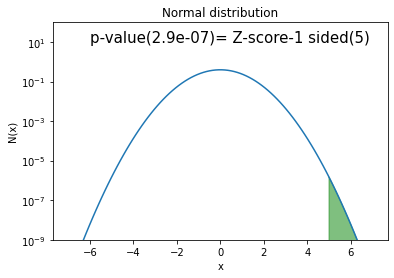

In [82]:
# one-tailed
p_value_one_tailed = 1 - stats.norm.cdf(n_sigma)

# Draw a normal distribution as before
xvals = np.linspace(-7,7,100)
yvals = [ stats.norm.pdf(xval) for xval in xvals ]
fig = plt.figure()
plt.yscale('log')
plt.ylim(1E-9,1E2)
plt.plot(xvals, yvals)
plt.title("Normal distribution")
plt.xlabel('x')
plt.ylabel('N(x)')

# Now fill in part of the distribution and print the integral
up = 1
shaded_xvals = np.linspace(n_sigma,7,100)
shaded_yvals = [ stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
plt.text(-6, 10, 'p-value(%.2g)= Z-score-1 sided(%g)' % (p_value_one_tailed, n_sigma), fontsize=15);

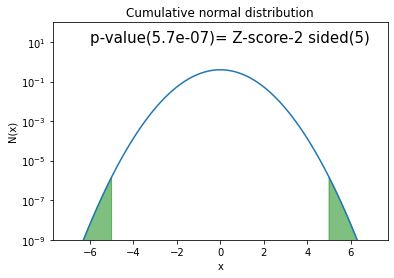

In [83]:
# two-tailed
p_value_two_tailed = 2. * (1 - stats.norm.cdf(n_sigma))


# Draw a normal distribution as before
xvals = np.linspace(-7,7,100)
yvals = [ stats.norm.pdf(xval) for xval in xvals ]
fig = plt.figure()
plt.yscale('log')
plt.ylim(1E-9,1E2)
plt.plot(xvals, yvals)
plt.title("Cumulative normal distribution")
plt.xlabel('x')
plt.ylabel('N(x)')

# Now fill in part of the distribution and print the integral
up = 1
shaded_xvals = np.linspace(n_sigma,7,50)
shaded_yvals = [ stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
shaded_xvals = np.linspace(-7,-n_sigma,50)
shaded_yvals = [ stats.norm.pdf(xval) for xval in shaded_xvals ]
plt.fill_between(shaded_xvals, shaded_yvals, alpha=0.5, color='g')
plt.text(-6, 10, 'p-value(%.2g)= Z-score-2 sided(%g)' % (p_value_two_tailed, n_sigma), fontsize=15);

In [84]:
#Task1 create a table to show mapping between Z-score and p-value (1 tailed), p-value (2 tailed).
print(f"Z-score\t p_value_one_tailed\t p_value_two_tailed")
for nsigma in [1, 2, 3, 4, 5]:
    p_value_one_tailed =  1 - stats.norm.cdf(nsigma)
    p_value_two_tailed =  2. * (1 - stats.norm.cdf(nsigma))
    print(f"{nsigma} \t {p_value_one_tailed:.2g}   \t {p_value_two_tailed:.2g}")

Z-score	 p_value_one_tailed	 p_value_two_tailed
1 	 0.16   	 0.32
2 	 0.023   	 0.046
3 	 0.0013   	 0.0027
4 	 3.2e-05   	 6.3e-05
5 	 2.9e-07   	 5.7e-07


# Part II Bayesian Credible Interval

Once the posterior distribution $P(\mu)$ is obtained (by marginalising over the nuisance parameters $\eta$, a Bayesian can quote a $(100\times\alpha)$\% \emph{credible interval} (or credible region in more than one dimension), as a region $\mu\in\Omega_{\alpha}$ for which,

$$
    P(\mu\in\Omega_{\alpha})=\int_{\Omega_{\alpha}} P(\mu)d\mu = \alpha.
$$

We will calculate the posterior distribution.
There can be multiple such regions, any of which satisfy this equation. Below is an example which finds the *shortest* such interval

In [85]:
import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
                      

In [86]:
# define the counting experiment
sigma_TH = 0.01
A   = 0.5
eff = 0.9
l   = 100.
k   = 0.3
B   = 0.5
n   = 2 # our measured data

# Poisson mean
def lamb(mu,eta):
  return mu*eff*A*l*((1+k)**eta)*sigma_TH + B



# Functions for Bayesian calculations

# Likelihood --> P(n|mu,eta) is a lambda distribution with two parameters
def Likelihood(n,mu,eta):
  l = lamb(mu,eta)
  return (l**n)*numpy.exp(-l)/numpy.math.factorial(int(n))

# prior on eta P(eta) is an exponential distribution of eta^2
def prior_eta(eta):
  c = 1./((2*numpy.pi)**0.5)
  return c*numpy.exp(-0.5*eta*eta)

# prior on mu P(mu) is uniform density betwen 0 and 25
def prior_mu(mu):
  return 1./25 if (mu < 25 and mu > 0) else 0

# and define the product of them (the numerator in Bayes rule)
def product(eta,mu,n):
  return Likelihood(n,mu,eta)*prior_mu(mu)*prior_eta(eta)

import scipy.integrate as integrate

# integrate over eta
def integral(mu,n):
  return integrate.quad(product,-6,6,args=(mu,n),epsabs=1.49e-03)[0]

# and then integrate over mu
def norm(n):
  return integrate.dblquad(product,0.01,25,lambda x:-6,lambda x:6,args=[n],epsabs=1.49e-03)[0]

In [87]:
xaxis = numpy.linspace(0.,25,200)

normalise = norm(n)
# plot the posterior
p_mu = [ integral(mu,n)/normalise for mu in xaxis ]

There can be multiple such regions, any of which satisfy this equation. Below is an example which finds the *shortest* such interval

In [88]:
# Use an approximate for the integral with rectangles
# Calculate all intervals which contain area >= 68.3%
# 
intervals=[]
for i in range(len(xaxis)):
 x = xaxis[i]
 #if x > 5: break
 inte=0
 for j in range(i,len(xaxis)-1):
   y = xaxis[j+1]
   yl = xaxis[j]
   inte += p_mu[j]*(y-yl)
   if inte >= 0.683:
    # print("xl:",x," interval:",y-x)
    intervals.append([y-x,[x,y],[i,j]])
    break

68.3% interval (0.38,7.54)


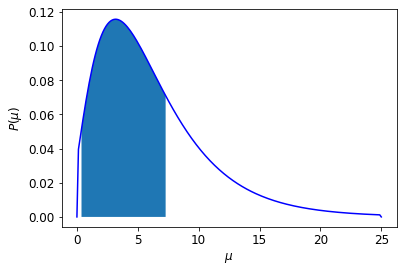

In [89]:
# Task2: find the shortest interval by using sort function
# Write your code here
intervals.sort()
interval = intervals[0]

lowerBound = interval[1][0]
upperBound =  interval[1][1]
print("68.3%% interval (%.2f,%.2f)"%(lowerBound,upperBound))

# plot interval as a shaded region
i=interval[2][0]; j=interval[2][1]
plt.plot(xaxis,p_mu,color='blue')
plt.fill_between(xaxis[i:j],p_mu[i:j])
plt.xlabel("$\\mu$")
plt.ylabel("$P(\mu)$")
plt.savefig("credible_interval.pdf")
plt.show()

# Part III unBinned Maximum Likelihood fit vs Binned Maximum Likelihood fit

We will compare the implementation of two ML fitters: unbinned vs binned.

The detailed description of the two can be found below:

## unbinned MLE
Sec 6.5.2
https://hepunx.rl.ac.uk/~adye/thesis/html/node50.html

$-2 ln L(\theta|x) = -2 \sum_{i=1}^{N} ln f(x_i|\theta)$

## binned MLE
Textbook Sec 6.5.6
https://hepunx.rl.ac.uk/~adye/thesis/html/node51.html

$-2 ln L(\theta|d) = -2 \sum_{i=1}^{B} -t_i + d_i ln (t_i)$, 
where $B$ is number of bins, $t_i$ is the expected yields in bin $i$ with dependence on $\theta$, and $d_i$ is the observed data in each bin $i$. The sum of each observed yields equal to total yields N, i.e. $\sum_{i=1}^{B} d_i=N$



Text(0, 0.5, '# Events/0.5 GeV')

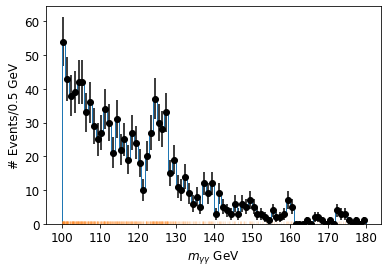

In [101]:
# Generate a distribution with exponential background and Gaussian peak

import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import poisson
from matplotlib import pyplot as plt

# Here i'm using iminuit minimizer 
import iminuit.minimize as minimize
import time #measure time performance

Ns = 100
Nb = 1000
xmin = 100
xmax = 180
nbins= 80
xr = (100, 180)  # xrange

np.random.seed(seed=1)

xdata = norm.rvs(loc=125.5, scale=2, size=Ns)
ydata = expon.rvs(loc=100, scale=20, size=Nb)

masses = np.append(xdata, ydata)
masses = masses[(xr[0] < masses) & (masses < xr[1])]

mass_hist, xe = np.histogram(masses, bins=nbins, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok")
plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/0.5 GeV")

In [75]:
# define probability distribution and likelihood function
def norm_S(x,MH,Width):
    return norm.pdf(x,MH,Width)

def norm_B(x,alpha):
    ainv=1./alpha
    r = expon.pdf(ainv*(x-xmin))
    c = r*ainv/(1.-expon.pdf(ainv*(xmax-xmin)))
    #print(x,alpha,r,c)
    return c 

@np.vectorize
def prob(x,MH,Width,fs,alpha):
    pB = norm_B(x,alpha)
    pS = norm_S(x,MH,Width)
    pTotal = fs*pS+(1.-fs)*pB
    return pTotal

@np.vectorize
def prob_fast(x,g,fs,alpha):
    pB = (1-fs)*norm_B(alpha)*(x**(-1.*alpha))
    pS = fs*g
    return pB+pS


## unbinned maximum likelihood fitting

In [91]:
def neg_log_likelihood(pars,data): # == q 
    MH=pars[0]
    Width=pars[1]
    fs=pars[2]
    alpha=pars[3]

    #N  = len(data)
    log_l = sum(np.log(prob(data,MH,Width,fs,alpha)))

    return -2*log_l

In [92]:
start = time.time()

N = len(masses)

bounds = [[123,128],[1,3],[0,1],[1.,200]]
res = minimize(neg_log_likelihood,[125.5,2.0,0.01,20],args=[masses],bounds=bounds)
print(res)
print("Maximum likelihood estimates -> ", res.x)

bestfit_mh = res.x[0]

timeUnbinned = time.time()-start

      fun: 8442.63203900672
 hess_inv: [[ 6.07760155e-02  7.79009464e-03  9.45186081e-05 -7.06514057e-03]
 [ 7.79009464e-03  4.75890754e-02  8.98884618e-04 -1.15579989e-02]
 [ 9.45186081e-05  8.98884618e-04  1.05552140e-04 -8.00509899e-04]
 [-7.06514057e-03 -1.15579989e-02 -8.00509899e-04  2.97371704e-01]]
  message: 'Optimization terminated successfully.'
   minuit: <FMin algorithm='Migrad' edm=3.045744424234895e-05 edm_goal=0.0001 errordef=0.5 fval=8442.63203900672 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=126 ngrad=0 reduced_chi2=nan>
(Param(number=0, name='x0', value=125.87123527430545, error=0.24611956823103753, merror=None, is_const=False, is_fixed=False, lower_limit=123.0, upper_limit=128.0), Param(number=1, name='x1', value=1.9098790774953245, error=0.21640896335284476, merror=None, 

<Figure size 432x288 with 0 Axes>

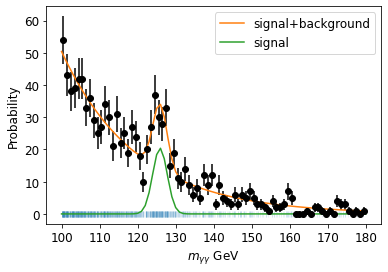

In [94]:
xspace = np.linspace(xmin,xmax,nbins+1)

#for x in xspace:
#    print(x,prob(x,126.5,2,0,1))

MH_hat=res.x[0]
Width_hat=res.x[1]
fs_hat=res.x[2]
alpha_hat=res.x[3]
fig = plt.figure()

fig = plt.figure()
plt.cla()
#plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
#plt.bar(xspace, Ns_and_Nb, color='orange', label='s+b')
#plt.bar(xspace, Nb_predict, color='b', label='b only')
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok")
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);
plt.plot(xspace,N*prob(xspace,MH_hat,Width_hat,fs_hat,alpha_hat),label='signal+background')
plt.plot(xspace,N*fs_hat*norm_S(xspace,MH_hat,Width_hat),label='signal')

#plt.plot(xspace,(Ns+Nb)*prob(xspace,125.5,2,Ns/(Ns+Nb),20),label='signal+background')
#plt.plot(xspace,Ns*norm.pdf(xspace,126.5,2),label='signal')
#plt.axis([100,180,0,0.05])
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("Probability")
#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

## binned maximum likleihood fitting 

In [95]:
# Use binCenter to calculate expected yields from PDF 
binWidth = (xmax-xmin)/nbins
binCenter=np.array([xmin + binWidth*(interval+0.5) for interval in range(nbins)])

def neg_binned_logL(pars,data):
    MH=pars[0]
    Width=pars[1]
    fs=pars[2]
    alpha=pars[3]
    N=sum(data)
    Ns_predict = N*fs*binWidth*norm_S(binCenter,MH,Width) # predicted signal yields in each bin
    Nb_predict = N*(1.-fs)*binWidth*norm_B(binCenter,alpha) # predicted background yields in each bin
    N_predict  = Ns_predict+Nb_predict

    #print(len(data),N)
    #print(data,N_predict)
#    for n_obs, n_predict in zip(data, N_predict):
#        print (n_obs, n_predict, poisson.pmf(n_obs, n_predict), np.log(poisson.pmf(n_obs, n_predict), poisson.logpmf(n_obs, n_predict))
    return -2*sum( [ n_obs*np.log(n_predict) - n_predict for n_obs, n_predict in zip(data, N_predict) ] )


In [104]:
# Task3 Use iminuit.minimize() function to fit the mass distribution using binned maximum log likelihood 

start= time.time()
print(mass_hist)

#Task 3. fit mass histograms. Instead of using unbinned data "masses", you want to use binned histogram "mass_hist"
# Make sure you set the initial fit parameter, and bound of each parameter in the minimizer() function.

resBinned = minimize(neg_binned_logL,[125.5,2.0,0.01,20],args=[mass_hist],bounds=bounds)

print(resBinned)
print("Binned Maximum likelihood estimates -> ", resBinned.x)

bestfit_mh = resBinned.x[0]

timeBinned=time.time()-start

[54 43 38 39 42 42 33 36 29 25 27 34 30 21 31 22 25 19 27 24 18 10 20 27
 37 30 28 33 15 19 11 10 14  9  6  8  5 12  9 12  3  9  5  4  3  6  3  6
  5  7  5  3  3  2  1  4  2  2  3  7  5  0  0  0  1  0  2  2  1  0  1  0
  4  3  3  1  0  1  0  1]
      fun: -4511.299316664728
 hess_inv: [[ 6.04446814e-02  8.38961659e-03  1.03114800e-04 -7.21237347e-03]
 [ 8.38961659e-03  4.67053382e-02  8.82297465e-04 -1.14506361e-02]
 [ 1.03114800e-04  8.82297465e-04  1.06011571e-04 -8.00674700e-04]
 [-7.21237347e-03 -1.14506361e-02 -8.00674700e-04  2.98499458e-01]]
  message: 'Optimization terminated successfully.'
   minuit: <FMin algorithm='Migrad' edm=5.040796678124263e-07 edm_goal=0.0001 errordef=0.5 fval=-4511.299316664728 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=105 ngrad=0 reduced_chi2=nan>
(Param(nu

<Figure size 432x288 with 0 Axes>

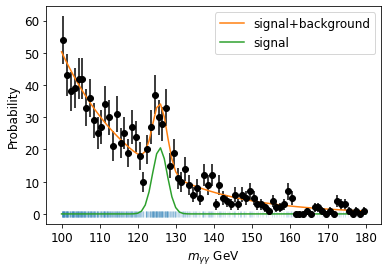

In [105]:
xspace = np.linspace(xmin,xmax,nbins+1)

#for x in xspace:
#    print(x,prob(x,126.5,2,0,1))

MH_hat   =resBinned.x[0]
Width_hat=resBinned.x[1]
fs_hat   =resBinned.x[2]
alpha_hat=resBinned.x[3]
fig =  plt.figure()

fig =  plt.figure()
plt.cla()
#plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
#plt.bar(xspace, Ns_and_Nb, color='orange', label='s+b')
#plt.bar(xspace, Nb_predict, color='b', label='b only')
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok")
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);
plt.plot(xspace,N*prob(xspace,MH_hat,Width_hat,fs_hat,alpha_hat),label='signal+background')
plt.plot(xspace,N*fs_hat*norm_S(xspace,MH_hat,Width_hat),label='signal')

#plt.plot(xspace,(Ns+Nb)*prob(xspace,125.5,2,Ns/(Ns+Nb),20),label='signal+background')
#plt.plot(xspace,Ns*norm.pdf(xspace,126.5,2),label='signal')
#plt.axis([100,180,0,0.05])
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("Probability")
#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

In [106]:
print("unbinned MLE time _> ", timeUnbinned, " s -> ", res.x)
print("Binned MLE time -> ", timeBinned, " s -> ", resBinned.x)

unbinned MLE time _>  42.33605909347534  s ->  [1.25871235e+02 1.90987908e+00 9.03580425e-02 1.98820801e+01]
Binned MLE time ->  0.1139988899230957  s ->  [1.25845754e+02 1.91948235e+00 9.14484913e-02 1.98991310e+01]
